# task 4

In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords
import string
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sonus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
data = pd.read_csv('twitter_validation task 4.csv')
v_data = pd.read_csv('twitter_validation task 4.csv')

In [5]:
data

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [6]:
v_data

,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [7]:
data.columns = ['id', 'game', 'sentiment', 'text']
v_data.columns = ['id', 'game', 'sentiment', 'text']

In [8]:
data

,id,game,sentiment,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [9]:
v_data

,id,game,sentiment,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [10]:
data.shape

(999, 4)

In [11]:
data.columns

Index(['id', 'game', 'sentiment', 'text'], dtype='object')

In [12]:
data.describe(include='all')

,id,game,sentiment,text
count,999.000000,999,999,999
unique,NaN,32,4,998
top,NaN,RedDeadRedemption(RDR),Neutral,Wow
freq,NaN,40,285,2
mean,6435.159159,NaN,NaN,NaN
std,3728.912226,NaN,NaN,NaN
min,6.000000,NaN,NaN,NaN
25%,3241.500000,NaN,NaN,NaN
50%,6560.000000,NaN,NaN,NaN
75%,9662.500000,NaN,NaN,NaN


In [13]:
id_types = data['id'].value_counts()
id_types

352     1
6890    1
364     1
2567    1
7780    1
       ..
8955    1
1565    1
3361    1
8408    1
6960    1
Name: id, Length: 999, dtype: int64

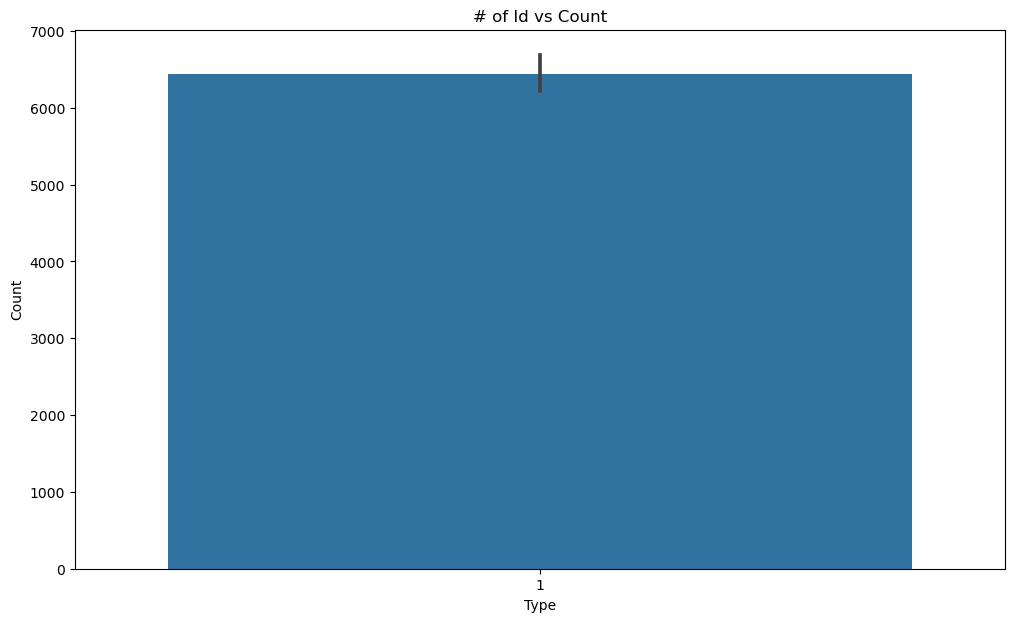

In [14]:
plt.figure(figsize=(12,7))
sns.barplot(y=id_types.index, x=id_types.values)  
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of Id vs Count')
plt.show()

In [15]:
game_types = data['game'].value_counts()
game_types

RedDeadRedemption(RDR)               40
johnson&johnson                      39
FIFA                                 38
PlayerUnknownsBattlegrounds(PUBG)    38
LeagueOfLegends                      37
ApexLegends                          36
Nvidia                               35
TomClancysRainbowSix                 35
GrandTheftAuto(GTA)                  35
Fortnite                             34
Amazon                               34
AssassinsCreed                       33
Borderlands                          33
PlayStation5(PS5)                    33
Hearthstone                          32
Overwatch                            32
Verizon                              32
CS-GO                                32
Facebook                             32
CallOfDuty                           31
Cyberpunk2077                        30
WorldOfCraft                         30
MaddenNFL                            29
Microsoft                            28
Dota2                                27


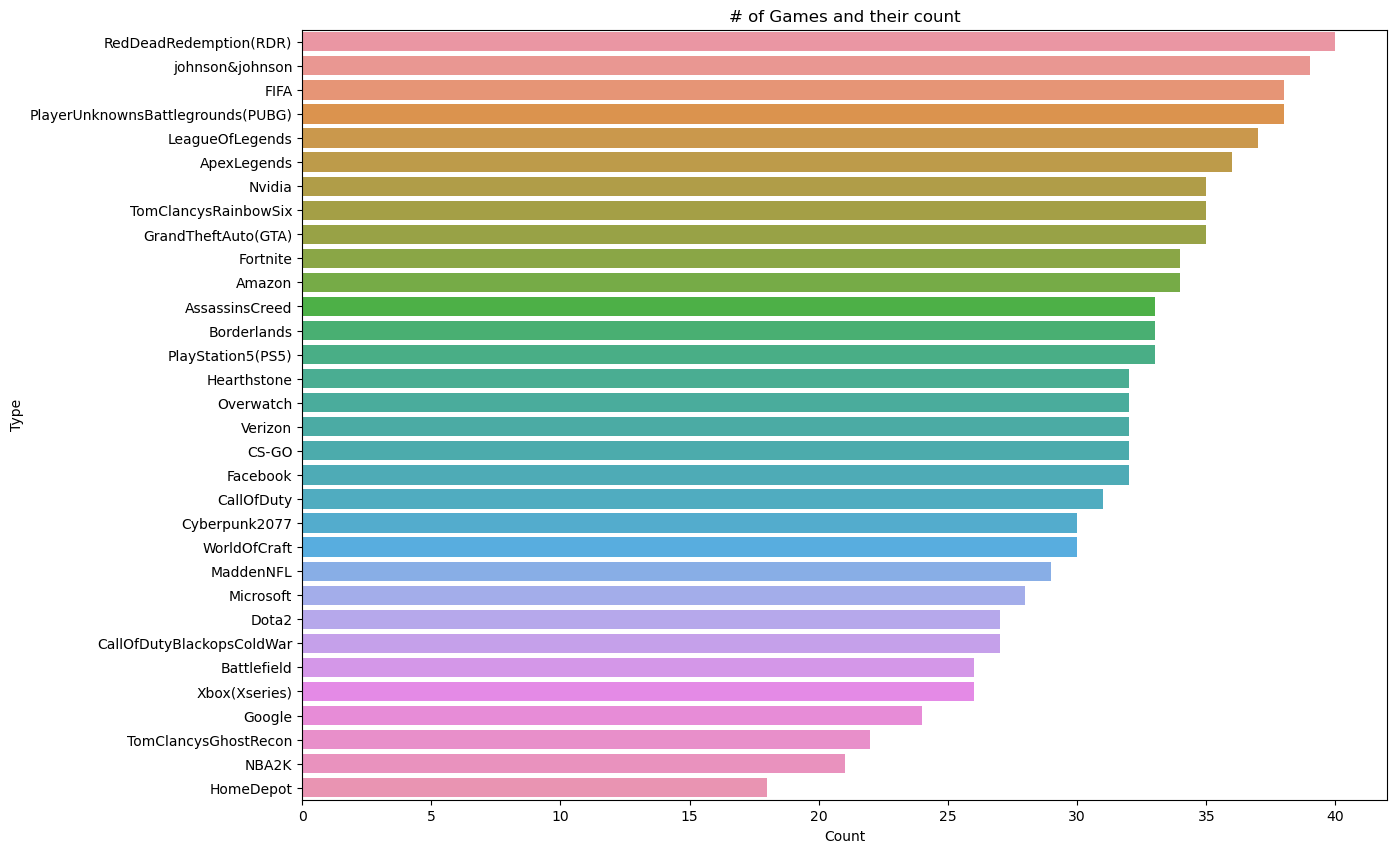

In [16]:
plt.figure(figsize=(14,10))

sns.barplot(x=game_types.values,y=game_types.index)  
plt.title('# of Games and their count')
plt.ylabel('Type')
plt.xlabel('Count')

plt.show()

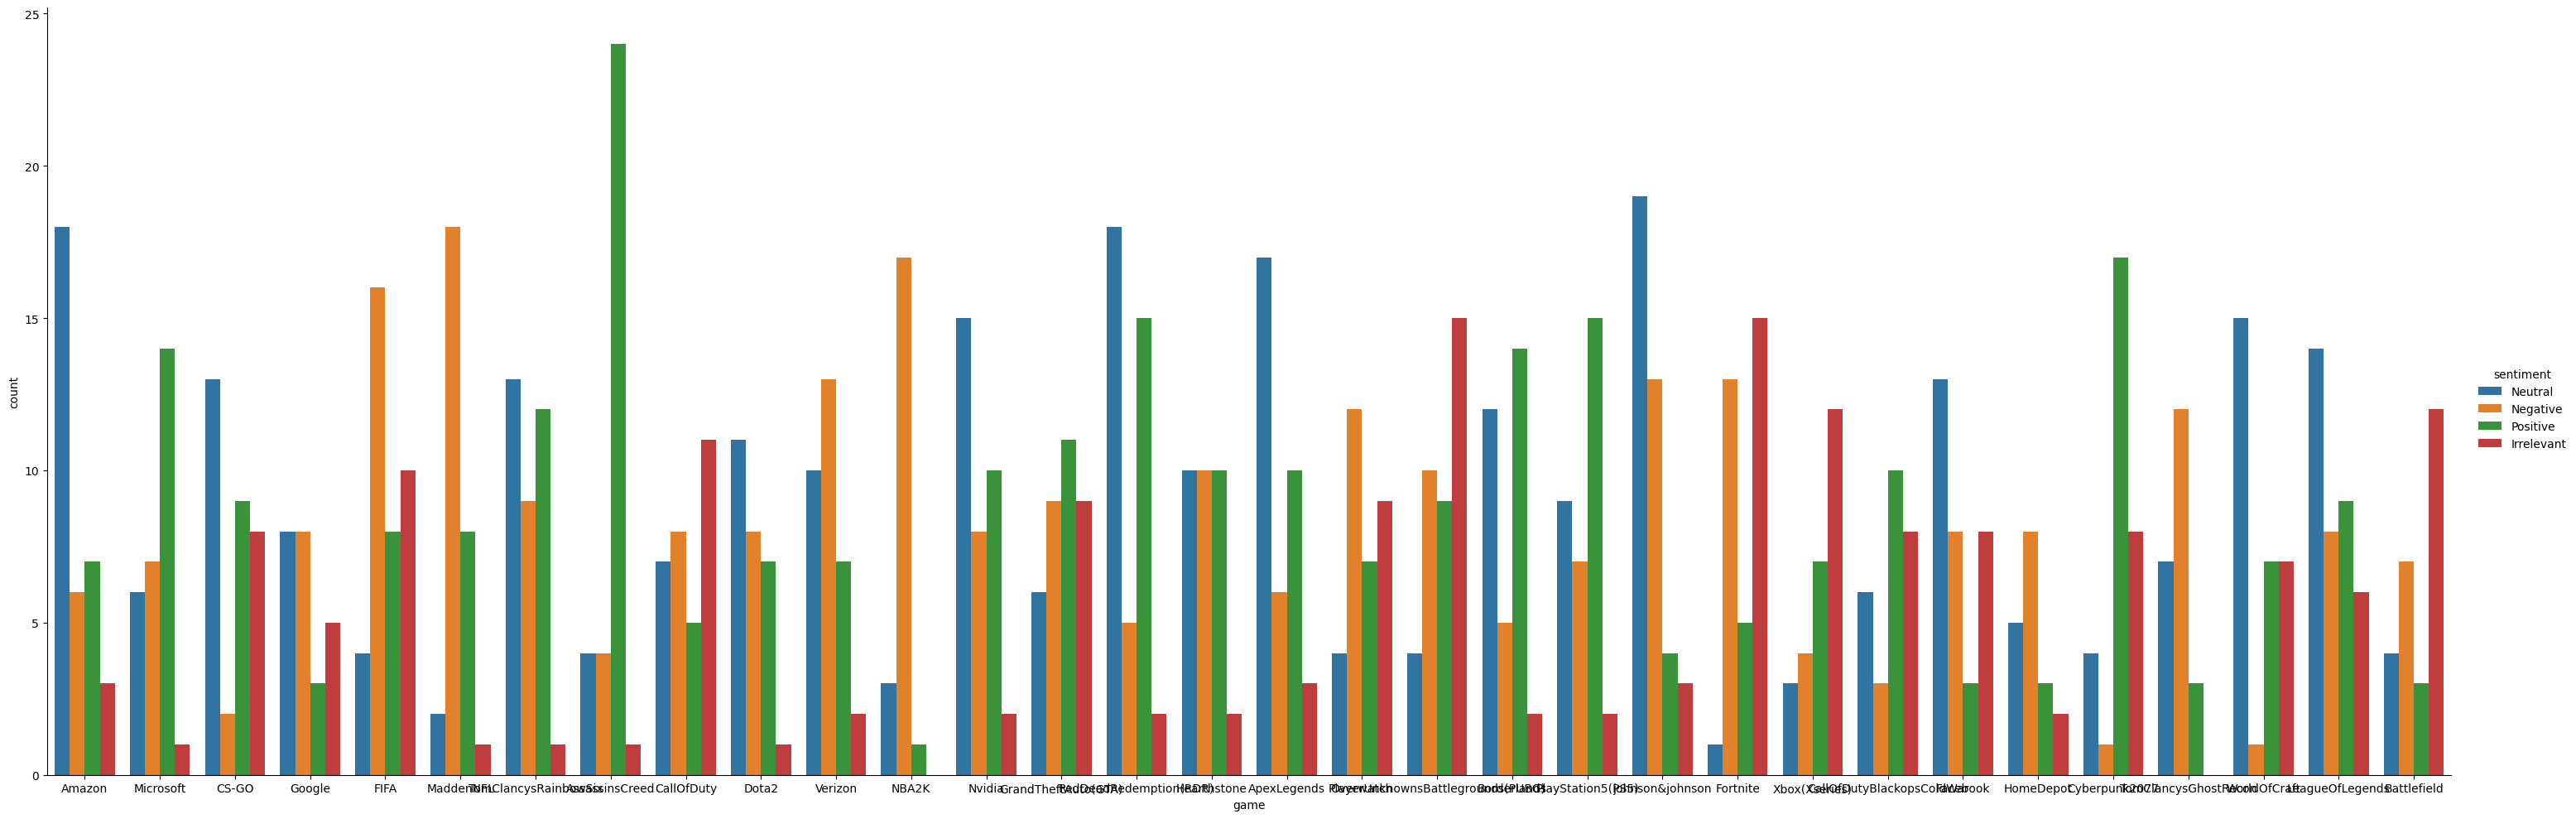

In [17]:
sns.catplot(x="game",hue="sentiment", kind="count",height=10,aspect=3, data=data)

<Axes: >

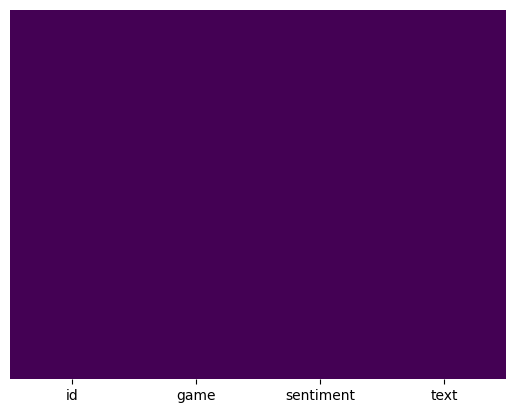

In [18]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
total_null=data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", data.shape[0])
missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  999


,Total Missing,In Percent
id,0,0.0
game,0,0.0
sentiment,0,0.0
text,0,0.0


In [20]:
data.dropna(subset=['text'],inplace=True)

total_null=data.isnull().sum().sort_values(ascending=False)
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending = False)
print("Total records = ", data.shape[0])
missing_data = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
missing_data.head(10)

Total records =  999


,Total Missing,In Percent
id,0,0.0
game,0,0.0
sentiment,0,0.0
text,0,0.0


In [21]:
train0=data[data['sentiment']=="Negative"]
train1=data[data['sentiment']=="Positive"]
train2=data[data['sentiment']=="Irrelevant"]
train3=data[data['sentiment']=="Neutral"]

In [22]:
train0.shape, train1.shape, train2.shape, train3.shape

((266, 4), (277, 4), (171, 4), (285, 4))

In [23]:
train0=train0[:int(train0.shape[0]/12)]
train1=train1[:int(train1.shape[0]/12)]
train2=train2[:int(train2.shape[0]/12)]
train3=train3[:int(train3.shape[0]/12)]

In [24]:
train0.shape, train1.shape, train2.shape, train3.shape

((22, 4), (23, 4), (14, 4), (23, 4))

In [25]:
data=pd.concat([train0,train1,train2,train3],axis=0)
data

,id,game,sentiment,text
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
8,2069,CallOfDuty,Negative,FIX IT JESUS ! Please FIX IT ! What In the wor...
11,11783,Verizon,Negative,"@FredTJoseph hey fred, Comcast cut the cable a..."
...,...,...,...,...
79,8121,Microsoft,Neutral,“the Free Software movement is dead. Linux doe...
82,12487,WorldOfCraft,Neutral,"this is the current status on the gold making,..."
84,4132,CS-GO,Neutral,I used a voice changer and pretended to be a g...
88,11175,TomClancysGhostRecon,Neutral,GM Fam!!! hope you are all up and being great ...


In [26]:
id_types = data['id'].value_counts()
id_types

8312     1
4286     1
352      1
6056     1
7564     1
        ..
1172     1
3185     1
1107     1
11332    1
5448     1
Name: id, Length: 82, dtype: int64

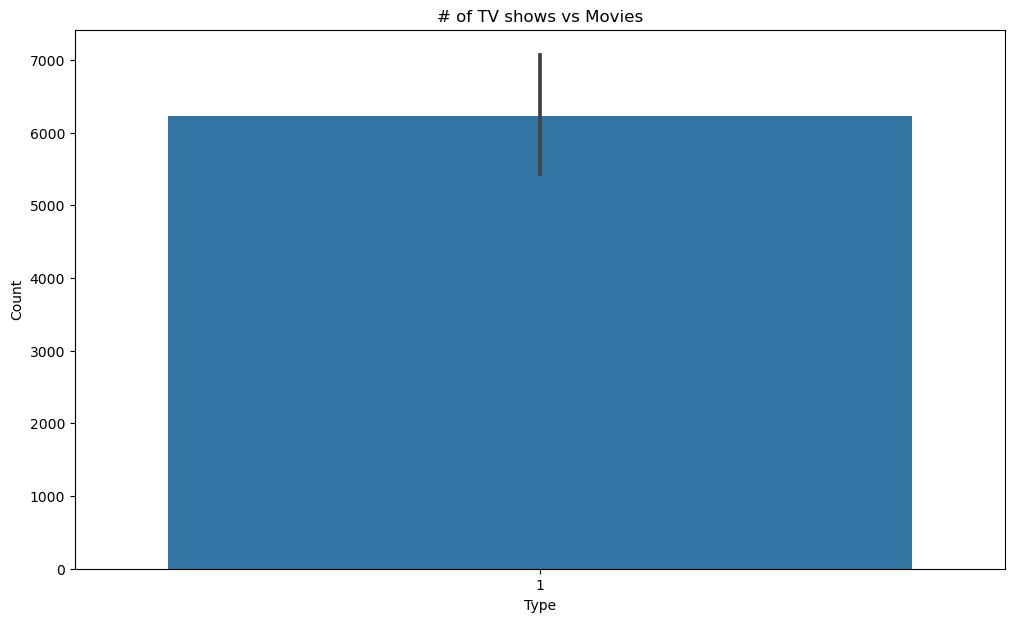

In [27]:
plt.figure(figsize=(12,7))
sns.barplot(x=id_types.values,y=id_types.index)

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of TV shows vs Movies')
plt.show()

In [28]:
game_types = data['game'].value_counts()
game_types

CallOfDuty                           11
TomClancysRainbowSix                  5
Nvidia                                4
FIFA                                  4
Overwatch                             4
CS-GO                                 4
AssassinsCreed                        4
PlayerUnknownsBattlegrounds(PUBG)     3
Amazon                                3
CallOfDutyBlackopsColdWar             3
Microsoft                             3
Hearthstone                           3
johnson&johnson                       3
Verizon                               3
NBA2K                                 3
TomClancysGhostRecon                  2
Google                                2
ApexLegends                           2
RedDeadRedemption(RDR)                2
Dota2                                 2
Xbox(Xseries)                         2
LeagueOfLegends                       1
Cyberpunk2077                         1
Facebook                              1
HomeDepot                             1


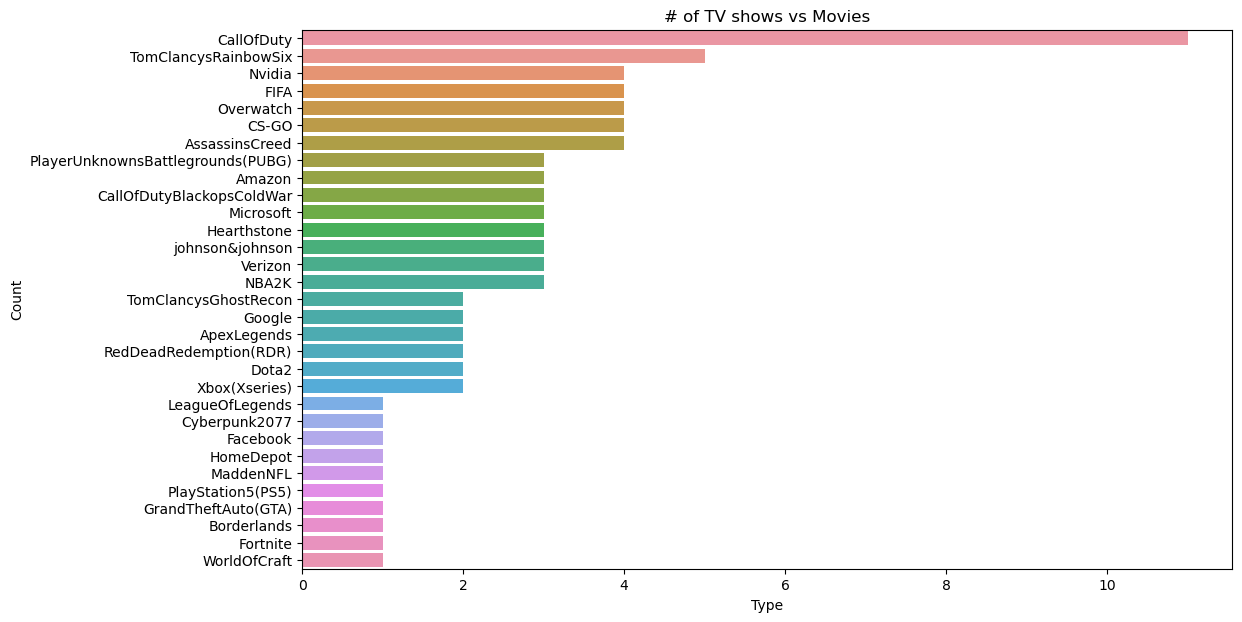

In [29]:
plt.figure(figsize=(12,7))
sns.barplot(x=game_types.values,y=game_types.index)

plt.xlabel('Type')
plt.ylabel('Count')
plt.title('# of TV shows vs Movies')
plt.show()

In [30]:
sentiment_types = data['sentiment'].value_counts()
sentiment_types

Positive      23
Neutral       23
Negative      22
Irrelevant    14
Name: sentiment, dtype: int64

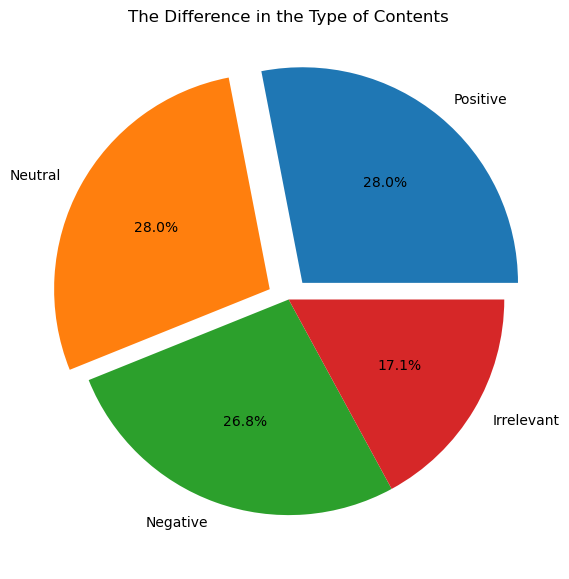

In [31]:
plt.figure(figsize=(12,7))
plt.pie(x=sentiment_types.values, labels=sentiment_types.index, autopct='%.1f%%', explode=[0.1, 0.1,0,0])
plt.title('The Difference in the Type of Contents')
plt.show()

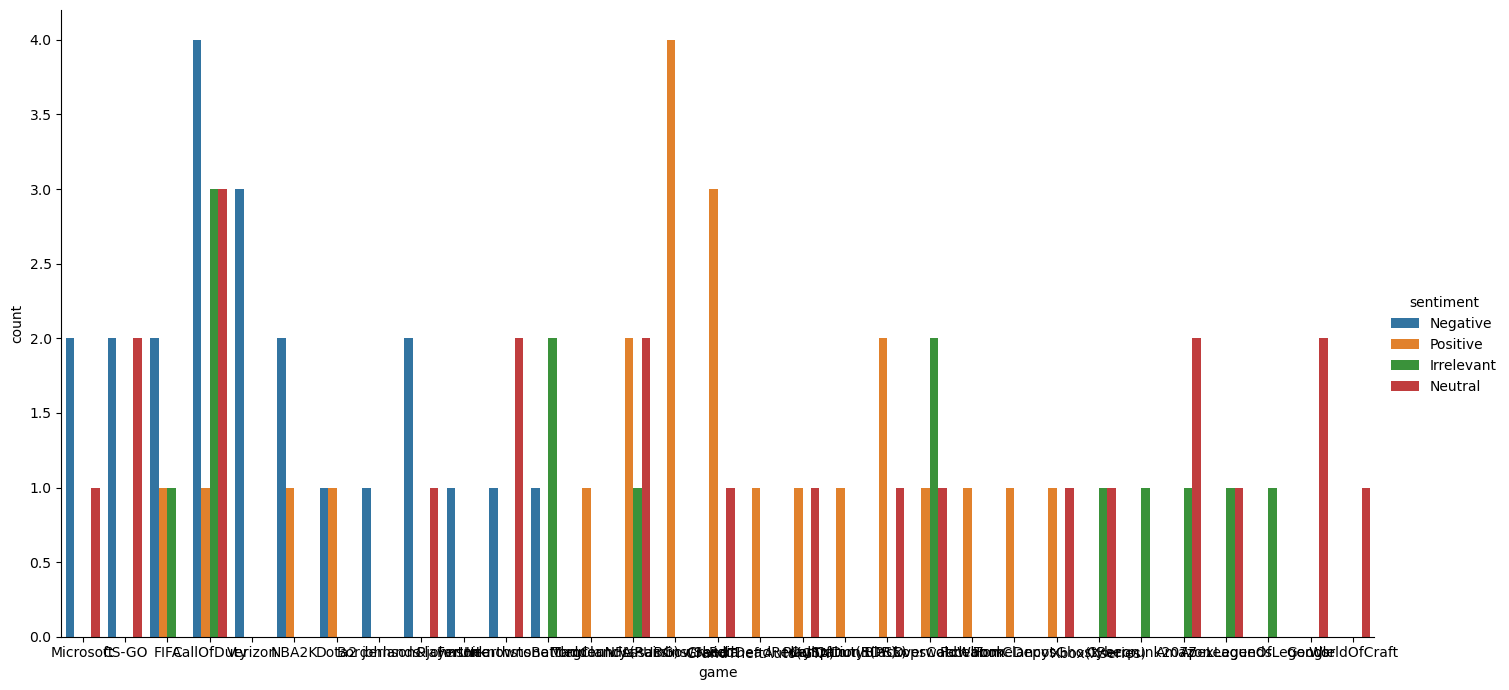

In [32]:
sns.catplot(x='game',hue='sentiment',kind='count',height=7,aspect=2,data=data)

In [33]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [34]:
data['sentiment']=label_encoder.fit_transform(data['sentiment'])
data['game']=label_encoder.fit_transform(data['game'])
v_data['sentiment']=label_encoder.fit_transform(v_data['sentiment'])
v_data['game']=label_encoder.fit_transform(v_data['game'])

In [35]:
data = data.drop(['id'],axis=1)

data

,game,sentiment,text
1,18,1,@Microsoft Why do I pay for WORD when it funct...
2,4,1,"CSGO matchmaking is so full of closet hacking,..."
4,9,1,Hi @EAHelp I’ve had Madeleine McCann in my cel...
8,5,1,FIX IT JESUS ! Please FIX IT ! What In the wor...
11,27,1,"@FredTJoseph hey fred, Comcast cut the cable a..."
...,...,...,...
79,18,2,“the Free Software movement is dead. Linux doe...
82,28,2,"this is the current status on the gold making,..."
84,4,2,I used a voice changer and pretended to be a g...
88,25,2,GM Fam!!! hope you are all up and being great ...


In [36]:
data.nunique()

game         31
sentiment     4
text         82
dtype: int64

In [37]:
v_data.nunique()

id           999
game          32
sentiment      4
text         998
dtype: int64